## Business Understanding 

### Developing a Machine Learning Model for Sepsis Prediction in ICU Patients

#### Introduction

Sepsis is a life-threatening medical condition that arises when the body's response to infection causes widespread inflammation, leading to organ dysfunction. Early detection of sepsis is critical for timely intervention and improved patient outcomes. In the context of an Intensive Care Unit (ICU), where patients are already vulnerable, the ability to predict the likelihood of sepsis can be a game-changer. This project aims to leverage machine learning techniques to create a predictive model that can identify patients at risk of developing sepsis based on their medical details.

#### Problem Statement
Despite advances in medical technology, sepsis remains a major challenge in ICUs, with its rapid onset and diverse clinical presentations. Early identification of sepsis is often difficult, leading to delayed interventions and increased mortality rates. This project addresses the need for a reliable and timely predictive model to assist healthcare professionals in identifying ICU patients who are at a higher risk of developing sepsis.


#### Hypothesis
Null Hypothesis (H0):

Patient attributes and health indicators, such as elevated plasma glucose, abnormal blood pressure, and specific blood work results, along with factor like age may not contribute significantly to the prediction of sepsis development in ICU patients.

Alternative Hypothesis (H1):

 Patient attributes and health indicators, such as elevated plasma glucose, abnormal blood pressure, and specific blood work results, along with factor like age may contribute significantly to the prediction of sepsis development in ICU patients.



 #### Questions

 1. Univariate Analysis:

* What is the distribution of age among ICU patients in the dataset?

2. Bivariate Analysis:

* Is there a correlation between the plasma glucose levels (PRG) and the development of sepsis?

* Is there a relationship between blood pressure and the development of sepsis

3. Multivariate Analysis:

* Considering the combination of blood work results (PL, SK, TS, M11, BD2), what patterns or interactions are observed in patients who develop sepsis?

4. Machine Learning Model Evaluation:

* What is the accuracy, precision, recall, and F1-score of the developed machine learning model in predicting sepsis?


### Data Fields

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose|
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)|
| SK              | Attribute 4      | Blood Work Result-2 (mm)|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)|                                                                                  
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)|
| Age              | Attribute 8      |    patients age  (years)|
| Insurance | N/A     | If a patient holds a valid insurance card|
| Sepssis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |

## DATA UNDERSTANDING

import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import os

import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbpipeline

#import the necessary Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import joblib
import warnings
warnings.filterwarnings("ignore")










## Load Dataset

In [2]:
# this is how we load the data

file_path1 = "/Users/mkboyoo/Desktop/Fapi/Lp6pro/Paitients_Files_Train.csv"
file_path2 = "/Users/mkboyoo/Desktop/Fapi/Lp6pro/Paitients_Files_Test.csv"

# Load the CSV files into DataFrames
train = pd.read_csv(file_path1)
test = pd.read_csv(file_path2)


## Exploratory data analysis (EDA)

In [3]:
train.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [5]:
train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [6]:
train["Sepssis"].unique()

array(['Positive', 'Negative'], dtype=object)

In [7]:
train.describe(include='all')


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
count,599,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599
unique,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,ICU200010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391
mean,NaN,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,NaN
std,NaN,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,NaN
25%,NaN,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,NaN
50%,NaN,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,NaN
75%,NaN,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,NaN


In [8]:
trainC =train.copy()

In [9]:
trainC.rename (columns={'PRG': 'Plasma_glucose','PL':'Blood_work1','PR': 'Blood_Pressure','SK':'Blood_work2','TS':'Blood_work3','M11':'BMI','BD2':'Blood_work4','Sepssis': 'Sepsis'},inplace=True)

#### Checking for outliers


Outliers are data points that deviate significantly from the rest of the observations in a dataset. These data points are unusually extreme or distinct in comparison to the majority of the data and can have a substantial impact on statistical analyses. Outliers can occur for various reasons, including measurement errors, data entry errors, natural variability in the data, or the presence of anomalies. Deviating data points can be identified using statistical methods or visualizations. Common techniques include the use of the interquartile range (IQR), z-scores, box plots, scatter plots, or more advanced statistical models.

Depending on the nature of the outliers and the goals of the analysis, decisions may be made on how to handle outliers. This could involve removing them, transforming the data, or using statistical methods robust to outliers.


##### Box plot to detect outliers

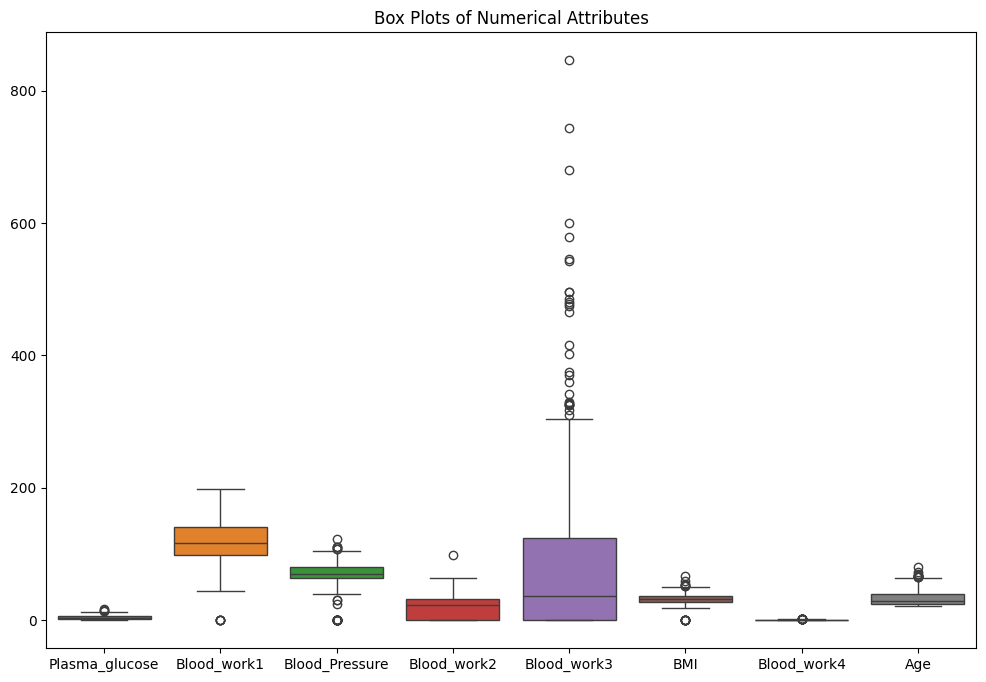

In [10]:
# Box plots using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=trainC[['Plasma_glucose', 'Blood_work1', 'Blood_Pressure', 'Blood_work2', 'Blood_work3', 'BMI', 'Blood_work4', 'Age']])
plt.title('Box Plots of Numerical Attributes')
plt.show()

In [11]:

fig = px.box(
    trainC,
    y=['Plasma_glucose', 'Blood_work1', 'Blood_Pressure', 'Blood_work2', 'Blood_work3', 'BMI', 'Blood_work4', 'Age'],
    title='Box Plots of Numerical Attributes'
)

# You can customize the color scale for better color gradings
# Uncomment the line below and modify the colors as needed
fig.update_traces(marker=dict(color='rgba(8,81,156,0.6)'))

fig.show()


The outliers are points or data that are more or less than the mean(average) of the mean all the datasets. From the above graph, there are outliers in all the numerical columns however, Blood work3 have has more outliers more which makes viewing the outliers of the other datasets quite difficult. 

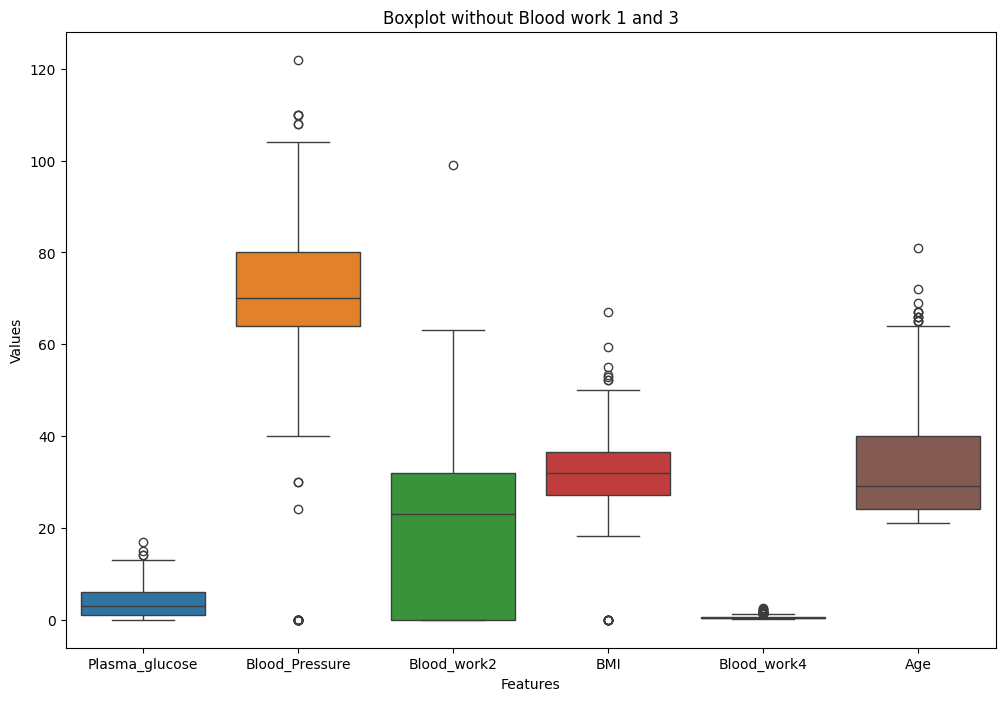

In [12]:
ts_out = trainC.drop(['Blood_work1','Blood_work3','Insurance'], axis=1)
plt.figure(figsize=(12, 8))
sns.boxplot(data=ts_out)
plt.title('Boxplot without Blood work 1 and 3')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

#### Checking for class distribution in the Sepsis column of the data

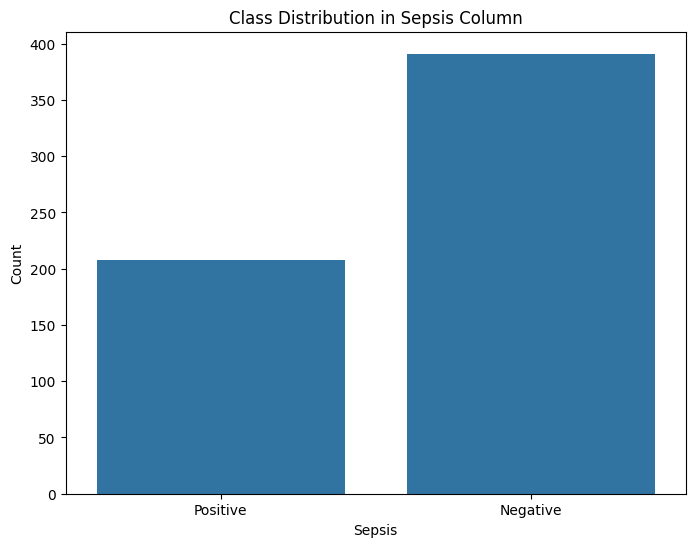

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sepsis', data=trainC)
plt.title('Class Distribution in Sepsis Column')
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.show()

 From the graph above, there is evidence of class imbalance in the dataset, with the occurrence of Negative values being nearly double that of Positive values. Achieving a balanced dataset is crucial for training models to prevent biases during predictions. It is imperative to address this imbalance to ensure the models are provided with a representative and fair dataset for optimal performance.

#### Checking for correlation in the dataset

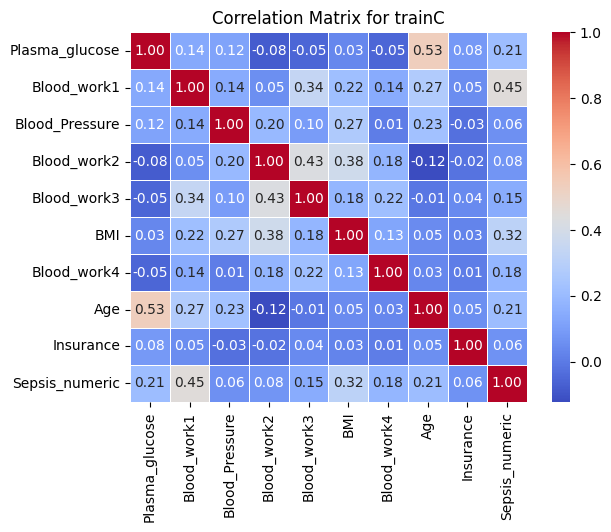

In [14]:
# Map 'Positive' and 'Negative' to numerical values
trainC['Sepsis_numeric'] = trainC['Sepsis'].map({'Positive': 1, 'Negative': 0})
# Exclude 'ID' and the original 'Sepssis' columns from correlation matrix
correlation_matrix = trainC.drop(['ID', 'Sepsis'], axis=1).corr()
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix for trainC')
plt.show()

From the correlation graph above,the variables demonstrate a lack of strong positive or negative correlations. However, age and plasma glucose exhibit a slightly above-average score, indicating a positive correlation of 0.53. In terms of the correlation figure, this suggests a moderate positive relationship between age and plasma glucose; as one variable increases, the other tends to increase as well, though not exceptionally strongly.

## Answering Analytical Questions 

 1. Univariate Analysis:

* What is the distribution of age among ICU patients in the dataset?


In [15]:

# Create a histogram with green bars
fig = px.histogram(trainC, x='Age', nbins=20, title='Age Distribution of Patients',
                   labels={'Age': 'Age', 'count': 'Count'},
                   color_discrete_sequence=['grey'])
fig.update_layout(xaxis_title='Age', yaxis_title='Count', showlegend=False)
fig.show()

2. Bivariate Analysis:

* Is there a correlation between the plasma glucose levels (PRG) and the development of sepsis?



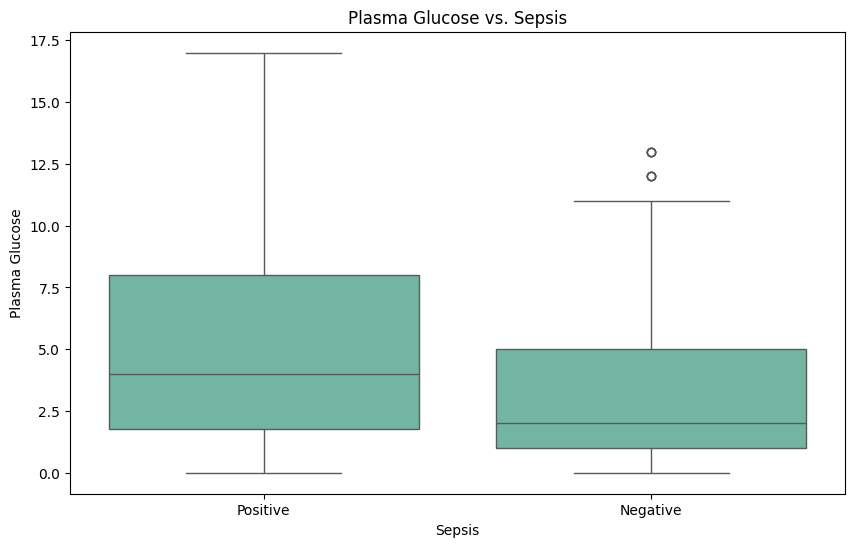

Correlation coefficient: 0.20711491012845162


In [16]:
# Assuming 'trainC' is your DataFrame
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")  # Set color palette
sns.boxplot(x='Sepsis', y='Plasma_glucose', data=trainC)
plt.title('Plasma Glucose vs. Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Plasma Glucose')
plt.show()

# Calculate correlation coefficient
correlation = trainC[['Plasma_glucose', 'Sepsis']].replace({'Positive': 1, 'Negative': 0}).corr().iloc[0, 1]

print(f"Correlation coefficient: {correlation}")


##### Above graph in Plotly


In [17]:
# Set color palette for the box plot
colors = px.colors.qualitative.Set2

fig = px.box(
    trainC,
    x='Sepsis',
    y='Plasma_glucose',
    color='Sepsis',
    color_discrete_sequence=colors,
    title='Plasma Glucose vs. Sepsis'
)

fig.update_layout(
    xaxis_title='Sepsis',
    yaxis_title='Plasma Glucose'
)

# Calculate correlation coefficient
correlation = trainC[['Plasma_glucose', 'Sepsis']].replace({'Positive': 1, 'Negative': 0}).corr().iloc[0, 1]

print(f"Correlation coefficient: {correlation}")
fig.show()

Correlation coefficient: 0.20711491012845162


Although from the dataset there is no strong positive correlation (0.207) between plasma glucose levels of the patients in the ICU and their chances of developing Sepsis, the chart suggests that individuals who do develop Sepsis exhibit approximately twice the plasma levels compared to those who do not. This observation is evident from the median values depicted in the box plot.

* Is there a relationship between blood pressure and the development of sepsis


In [18]:
# Set color palette for the box plot
colors = px.colors.qualitative.Set3

fig = px.box(
    trainC,
    x='Sepsis',
    y='Blood_Pressure',
    color='Sepsis',
    color_discrete_sequence=colors,
    title='Blood Pressure vs. Sepsis'
)

fig.update_layout(
    xaxis_title='Sepsis',
    yaxis_title='Blood Pressure'
)

# Calculate correlation coefficient
correlation = trainC[['Blood_Pressure', 'Sepsis']].replace({'Positive': 1, 'Negative': 0}).corr().iloc[0, 1]

print(f"Correlation coefficient: {correlation}")
fig.show()

Correlation coefficient: 0.06108646368071455


There is no significant difference in blood pressure between those who have sepsis and those who do not. In fact, those who did not have sepsis recorded a few high numbers compared to those who developed sepsis. This with the correlation coefficients informs us that a high or abnormally low blood pressure does not necessarily indicate a patient developing sepsis. 

 * What age group has high plasma glucose and their likelihood of developing sepsis


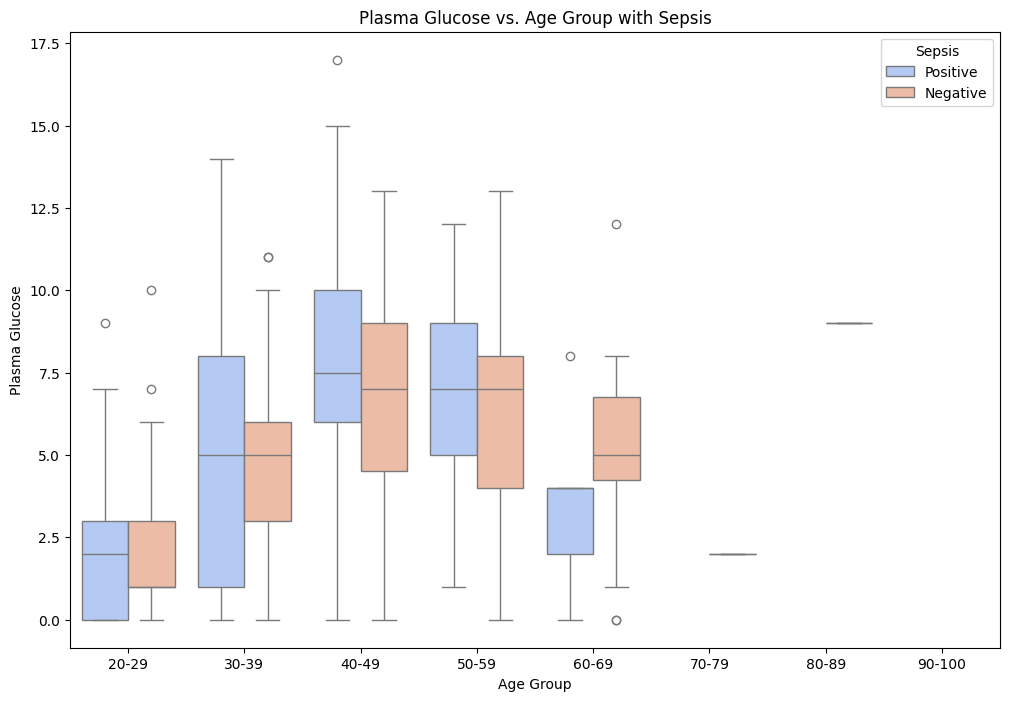

In [19]:
# Define age groups
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
trainC['Age_Group'] = pd.cut(trainC['Age'], bins=bins, labels=labels, right=False)

# Define a custom color palette with different shades of green and blue
colors = sns.color_palette("coolwarm", n_colors=2)

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='Plasma_glucose', hue='Sepsis', data=trainC, palette=colors)
plt.title('Plasma Glucose vs. Age Group with Sepsis')
plt.xlabel('Age Group')
plt.ylabel('Plasma Glucose')
plt.show()

From a scientific academic research, every decade-increase in age is associated with 0.263 mmol/L increase in the 2-hour plasma glucose level[Reference: Ko GT, Wai HP, Tang JS. Effects of age on plasma glucose levels in non-diabetic Hong Kong Chinese. Croat Med J. 2006 Oct;47(5):709-13. PMID: 17042062; PMCID: PMC2080461.]. However,in this graph above, plasma glucose rose with over 2.5 difference as the ages increased which was in line with the finding until the decrease in the plasma glucose levels amongsts patients within 50 -59 year group and then reduced drastically amongst the 60 -69 years group. Unfortunately,the graph does not show any evidence of rise and fall within the older groups(70 to 89). This may mean that patients who may have higher plasma glucose as the ages increase however it is not very conclusive. Futhermore increase in plasma glucose does not give a clear indication that a person will develop sepsis especially between the different age groups. 

3. Multivariate Analysis:

* Considering the combination of blood work results (PL, SK, TS, M11, BD2), what patterns or interactions are observed in patients who develop sepsis?

Explanation: We want know if the variations in blood work 1, 2 and 3 and plasma glucose indicates that the patient had sepsis or not. This is to make me know if the successive blood tests figures and patient plasma glucose aided in telling if a patient has sepsis or not.  

#### Visualize the distributions of Blood_work1, Blood_work2, Blood_work3, and Plasma_glucose for both sepsis-positive and sepsis-negative cases.


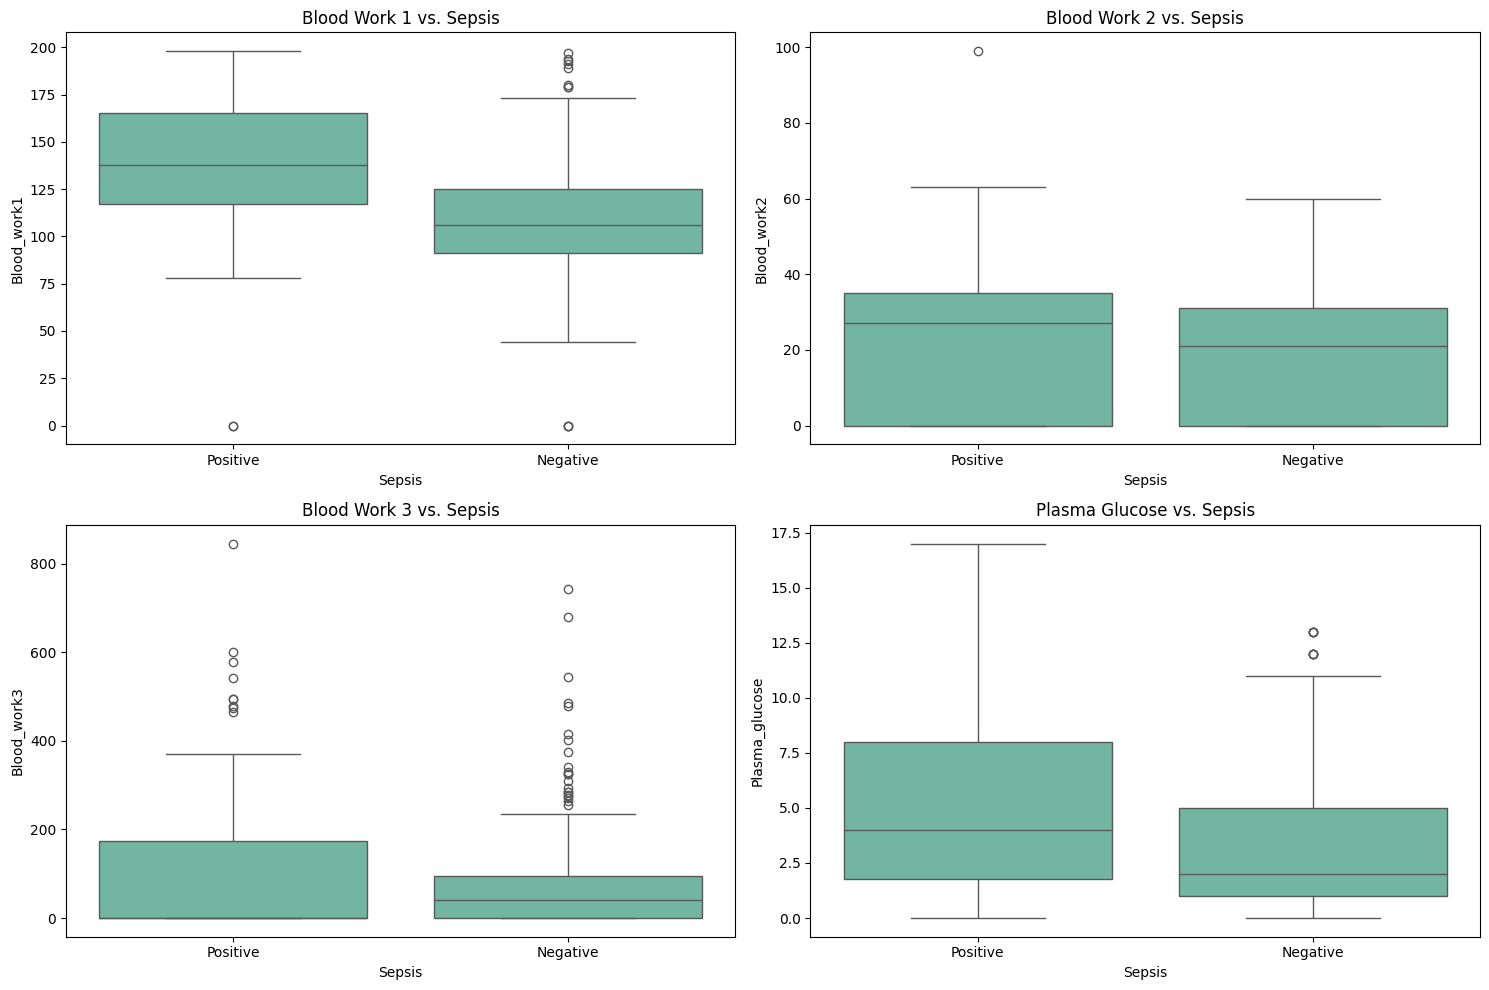

In [20]:
# Set up subplots for better comparison
plt.figure(figsize=(15, 10))

# Blood Work 1
plt.subplot(2, 2, 1)
sns.boxplot(x='Sepsis', y='Blood_work1', data=trainC)
plt.title('Blood Work 1 vs. Sepsis')

# Blood Work 2
plt.subplot(2, 2, 2)
sns.boxplot(x='Sepsis', y='Blood_work2', data=trainC)
plt.title('Blood Work 2 vs. Sepsis')

# Blood Work 3
plt.subplot(2, 2, 3)
sns.boxplot(x='Sepsis', y='Blood_work3', data=trainC)
plt.title('Blood Work 3 vs. Sepsis')

# Plasma Glucose
plt.subplot(2, 2, 4)
sns.boxplot(x='Sepsis', y='Plasma_glucose', data=trainC)
plt.title('Plasma Glucose vs. Sepsis')

plt.tight_layout()
plt.show()


#### Calculate the correlation matrix to quantify the relationships between these variables and sepsis.

In [21]:
correlation_matrix = trainC[['Blood_work1', 'Blood_work2', 'Blood_work3', 'Plasma_glucose', 'Sepsis_numeric']].corr()
correlation_matrix['Sepsis_numeric']


Blood_work1       0.449719
Blood_work2       0.075585
Blood_work3       0.145892
Plasma_glucose    0.207115
Sepsis_numeric    1.000000
Name: Sepsis_numeric, dtype: float64

Blood works 1 and 3 exhibited a correlation with detecting sepsis in a patient thus if one variable increases, the other variable increases too and same for plasma glucose. Although this is a weak positive correlation, it can not be overlooked in this analysis. 

In [22]:
sepsis_positive = trainC[trainC['Sepsis_numeric'] == 1]
sepsis_negative = trainC[trainC['Sepsis_numeric'] == 0]

for feature in ['Blood_work1', 'Blood_work2', 'Blood_work3', 'Plasma_glucose']:
    t_stat, p_value = ttest_ind(sepsis_positive[feature], sepsis_negative[feature])
    print(f'{feature}: t-statistic = {t_stat}, p-value = {p_value}')


Blood_work1: t-statistic = 12.302534453051374, p-value = 3.678522495138333e-31
Blood_work2: t-statistic = 1.852114423904815, p-value = 0.06450285034380407
Blood_work3: t-statistic = 3.603210651372271, p-value = 0.0003405167334140954
Plasma_glucose: t-statistic = 5.172721512358376, p-value = 3.154172341568826e-07


##### This explains the boxplot above better
The results from t-tests conducted to assess whether the mean values of different variables (Blood_work1, Blood_work2, Blood_work3, and Plasma_glucose) differ significantly between sepsis-positive and sepsis-negative cases. Let's break down the key components of each result:

* Blood_work1:

t-statistic: 12.3025

p-value: 3.6785e-31

The extremely low p-value (close to zero) indicates strong evidence against the null hypothesis. In this case, the null hypothesis would be that there is no difference in the mean Blood_work1 values between sepsis-positive and sepsis-negative cases. The low p-value suggests that there is a significant difference, and you would likely reject the null hypothesis. The positive t-statistic indicates that the mean Blood_work1 is significantly higher in sepsis-positive cases compared to sepsis-negative cases.

* Blood_work2:

t-statistic: 1.8521

p-value: 0.0645

The p-value here is greater than the commonly used significance level of 0.05. This suggests that there isn't strong evidence to reject the null hypothesis. In other words, there isn't sufficient evidence to conclude that the mean Blood_work2 values differ significantly between sepsis-positive and sepsis-negative cases. The t-statistic is positive, indicating that the mean Blood_work2 is slightly higher in sepsis-positive cases, but the evidence is not strong.

* Blood_work3:

t-statistic: 3.6032

p-value: 0.00034

The very low p-value indicates strong evidence against the null hypothesis. Similar to Blood_work1, there is a significant difference in the mean Blood_work3 values between sepsis-positive and sepsis-negative cases. The positive t-statistic suggests that the mean Blood_work3 is higher in sepsis-positive cases.

* Plasma_glucose:

t-statistic: 5.1727

p-value: 3.1542e-07

The extremely low p-value indicates strong evidence against the null hypothesis. There is a significant difference in the mean Plasma_glucose values between sepsis-positive and sepsis-negative cases. The positive t-statistic suggests that the mean Plasma_glucose is higher in sepsis-positive cases.

In summary, the t-tests provide evidence that Blood_work1, Blood_work3, and Plasma_glucose exhibit significant differences in mean values between sepsis-positive and sepsis-negative cases, while Blood_work2 does not show strong evidence of a significant difference. The p-value is a crucial indicator, with lower values suggesting stronger evidence against the null hypothesis.


This gives us the evidence that multiple successive blood tests are crucial in determining if a patient will develop blood sepsis or not and also may help ascertain the effectiveness of drugs administered. 

* What the trend in blood works for patients in the different age groups. 

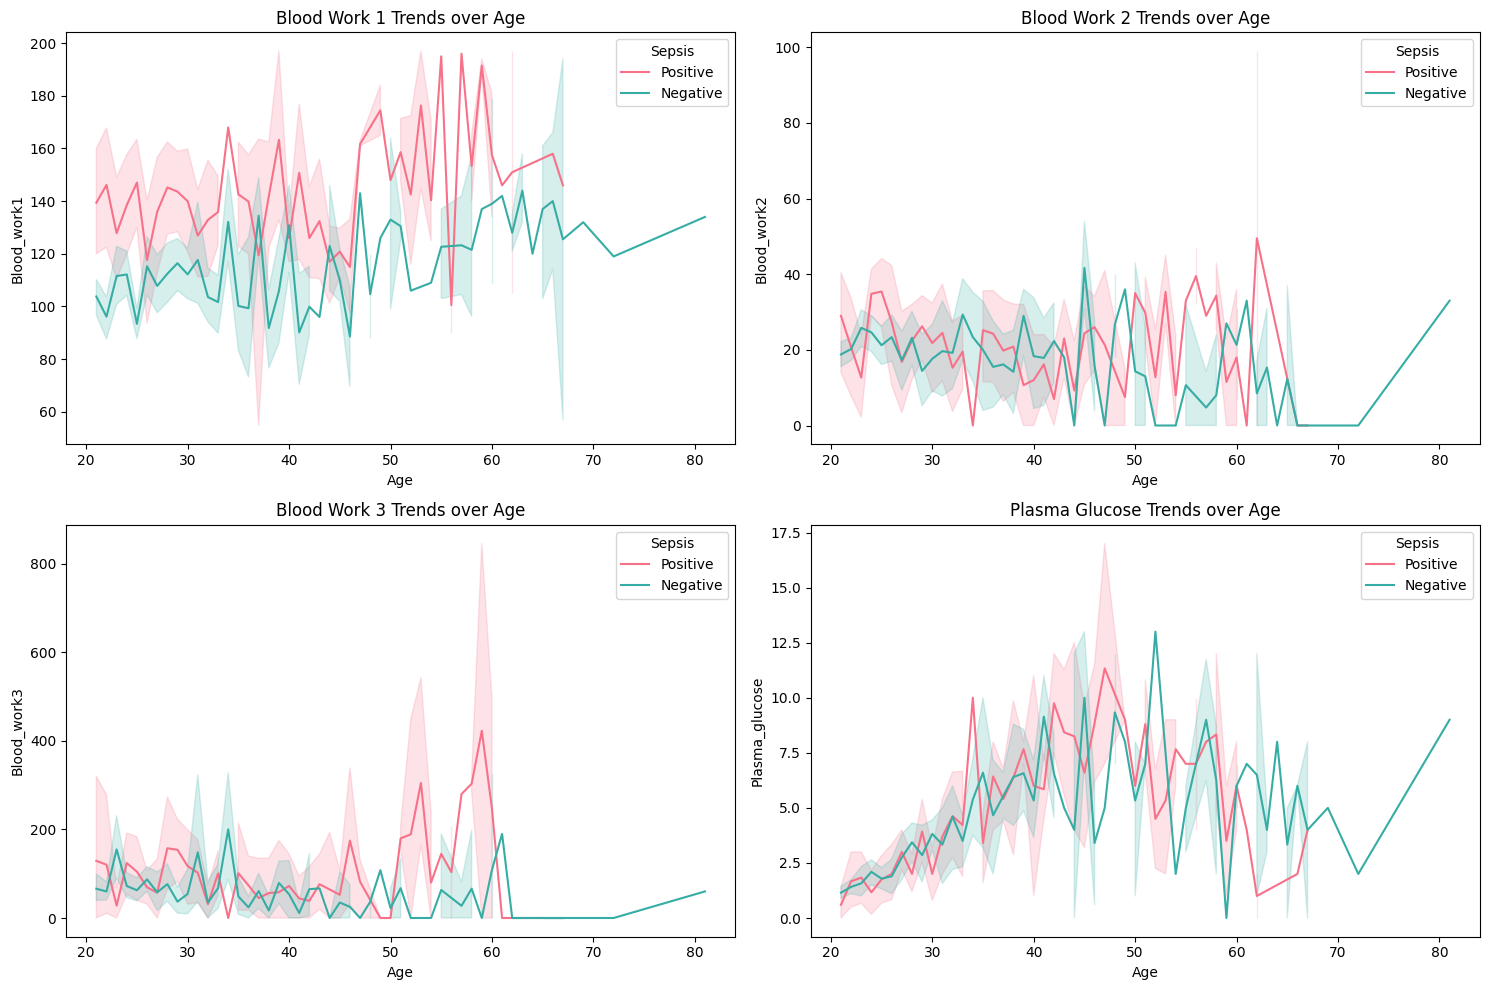

In [23]:
# Set up subplots for each blood work variable
plt.figure(figsize=(15, 10))

# Blood Work 1
plt.subplot(2, 2, 1)
sns.lineplot(x='Age', y='Blood_work1', hue='Sepsis', data=trainC, palette='husl')
plt.title('Blood Work 1 Trends over Age')

# Blood Work 2
plt.subplot(2, 2, 2)
sns.lineplot(x='Age', y='Blood_work2', hue='Sepsis', data=trainC, palette='husl')
plt.title('Blood Work 2 Trends over Age')

# Blood Work 3
plt.subplot(2, 2, 3)
sns.lineplot(x='Age', y='Blood_work3', hue='Sepsis', data=trainC, palette='husl')
plt.title('Blood Work 3 Trends over Age')

# Plasma Glucose
plt.subplot(2, 2, 4)
sns.lineplot(x='Age', y='Plasma_glucose', hue='Sepsis', data=trainC, palette='husl')
plt.title('Plasma Glucose Trends over Age')

plt.tight_layout()
plt.show()

Here, it is observed that patients blood works reduced significantly. From Blood work 1 to blood work 3, there was an amount of decrease in values which could give a clue on patients responding to treatment. Although there were flactuations, there are still significant drop in values for both Septic negative and positive patients. 

In [24]:
#trainC_c = trainC.copy()

In [25]:


# Define significance level
alpha = 0.05

# Hypothesis Testing for Plasma Glucose
sepsis_positive_glucose = trainC[trainC['Sepsis'] == 'Positive']['Plasma_glucose']
sepsis_negative_glucose = trainC[trainC['Sepsis'] == 'Negative']['Plasma_glucose']

t_statistic_glucose, p_value_glucose = ttest_ind(sepsis_positive_glucose, sepsis_negative_glucose)

print(f'T-statistic for Plasma Glucose: {t_statistic_glucose}')
print(f'P-value for Plasma Glucose: {p_value_glucose}')

if p_value_glucose < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean plasma glucose levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean plasma glucose levels.")

print('...............................................................................................')

# Hypothesis Testing for Age
sepsis_positive_age = trainC[trainC['Sepsis'] == 'Positive']['Age']
sepsis_negative_age = trainC[trainC['Sepsis'] == 'Negative']['Age']

t_statistic_age, p_value_age = ttest_ind(sepsis_positive_age, sepsis_negative_age)

print(f'T-statistic for Age: {t_statistic_age}')
print(f'P-value for Age: {p_value_age}')

if p_value_age < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean age.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean age.")


print('...............................................................................................')

# Hypothesis Testing for Abnormal Blood Pressure (Categorical Variable)
contingency_table = pd.crosstab(trainC['Blood_Pressure'], trainC['Sepsis'])

chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic for Blood Pressure: {chi2_stat}')
print(f'P-value for Blood Pressure: {p_value_chi2}')

if p_value_chi2 < alpha:
    print("Reject the null hypothesis. There is a significant association between  blood pressure and sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between blood pressure and sepsis.")


T-statistic for Plasma Glucose: 5.172721512358376
P-value for Plasma Glucose: 3.154172341568826e-07
Reject the null hypothesis. There is a significant difference in mean plasma glucose levels.
...............................................................................................
T-statistic for Age: 5.254202967191448
P-value for Age: 2.0718778891881855e-07
Reject the null hypothesis. There is a significant difference in mean age.
...............................................................................................
Chi-square statistic for Blood Pressure: 48.377753167041284
P-value for Blood Pressure: 0.2648068035954414
Fail to reject the null hypothesis. There is no significant association between blood pressure and sepsis.


## DATA PREPARATION

In [26]:
train.rename(columns={"Sepssis": "Sepsis"}, inplace=True)


In [27]:
train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [28]:


# Split dataframe in X and Y

X = train.drop(['ID', 'Sepsis'], axis=1)  # Features (excluding 'ID' and 'Sepssis')
y = train['Sepsis']  # Target variable

# Store column names for reference
col_input = X.columns

print (col_input)


# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')


In [29]:
#Creating pipelines


preproc = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(),col_input),
        ('logtrans',FunctionTransformer(np.log1p),col_input)
        
    ]
)



In [30]:
# encoding the target variable

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


### Check Class Balance

In [31]:




# Define the resampling strategy
#oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy

oversampler = RandomOverSampler(random_state=42)




### Modeling

In [32]:
# Create a pipeline with preprocessing, oversampling, and the classifier
knnpipeline = imbpipeline(steps=[
    ('preproc', preproc),
    ('oversample', oversampler),
    ('kneighbor', KNeighborsClassifier())
])

# Fit the pipeline with the training data
knnpipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('logtrans',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('oversample', RandomOverSampler(random_state=42)),
                ('kneighbor', KNeighborsClassifier())])

In [33]:


# Create a pipeline with preprocessing, oversampling, and the classifier
decision_pipeline = imbpipeline(steps=[
    ('preproc', preproc),
    ('oversample', oversampler),
    
    ('decision_tree', DecisionTreeClassifier())
])

# Fit the pipeline with the training data
decision_pipeline.fit(X_train, y_train_encoded)



Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('logtrans',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('oversample', RandomOverSampler(random_state=42)),
                ('decision_tree', DecisionTreeClassifier())])

In [34]:


# Create a pipeline with preprocessing, oversampling, and the classifier
log_pipeline = imbpipeline(steps=[
    ('preproc', preproc),
    ('oversample', oversampler),
    ('logistic_regression', LogisticRegression())
])

# Fit the pipeline with the training data
log_pipeline.fit(X_train, y_train_encoded)



Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('logtrans',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('oversample', RandomOverSampler(random_state=42)),
                ('logistic_regression', LogisticRegression())])

### Evaluation

In [35]:
d_tree = decision_pipeline.predict(X_test)

In [36]:
print(classification_report(y_test_encoded,d_tree))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        78
           1       0.57      0.57      0.57        42

    accuracy                           0.70       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.70      0.70      0.70       120



In [37]:
knn_pred = knnpipeline.predict(X_test)

In [38]:
print(classification_report(y_test_encoded,knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72        78
           1       0.53      0.79      0.63        42

    accuracy                           0.68       120
   macro avg       0.69      0.71      0.68       120
weighted avg       0.74      0.68      0.69       120



In [39]:
logreg_pred = log_pipeline.predict(X_test)

In [40]:
print(classification_report(y_test_encoded,logreg_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        78
           1       0.58      0.76      0.66        42

    accuracy                           0.73       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.75      0.72      0.73       120



# Saving the Pipeline and Encoder

In [41]:
joblib.dump(knnpipeline, 'knnpipelinebal.joblib')
joblib.dump(label_encoder, 'labelencoderbal.joblib')
joblib.dump(log_pipeline, 'logpipelinebal.joblib')

['logpipelinebal.joblib']